# Solutions to exercises in the chapters


In [1]:
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector
import qiskit.tools.jupyter



## Chapter 3 Part 1 Complex Numbers 

### Complex numbers

### 3.1
### 3.2 

## Chapter 3 Part 2 Linear algebra

### 3.3  
### 3.4 
### 3.5 


## Chapter 4 Dirac Notation
### 4.1 


If the coin is 3 times more likely to be heads than tails, $P(H) = 3/4$ and $P(T) = 1/4$. This gives us probability amplitudes of $\sqrt{3}/2$ for heads and $1/2$ for tails. 

$$\ket{\psi} = \sqrt{3}/2\ket{H} + 1/2\ket{T}$$

We can write this as a column vector as

$$
\ket{\psi} = \frac{1}{2}\begin{bmatrix}
\sqrt{3} \\ 1
\end{bmatrix}

$$

### 4.2 Expectation values


We could write the expectation, E would be

$$
E = \sum_{i = 1}^{6} i \times P(i)
$$

$$
E = 1 \times \frac{1}{6} + 2 \times \frac{1}{6} + 3 \times \frac{1}{6} +  4 \times \frac{1}{6} + 5 \times \frac{1}{6} + 6 \times \frac{1}{6}  
$$

$$  = \frac{21}{6} = 3.5 $$ 

So we would expect, on average, to get a number a little more than 3.


The exercise *4.2* can be done instead by introducing an operator. We can define the number operator $N$ which multiplies the state by the number it is in. So for instance 

$$ N \ket{4} = 4\ket{4} $$

This operator effectively scales the state by the number. As a matrix this looks like 

$$ N = \begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 \\0 & 2 & 0 & 0 & 0 & 0  \\ 0 & 0 & 3 & 0 & 0 & 0 \\ 0 & 0  & 0 &4 & 0 & 0 \\ 0 & 0 & 0 & 0 & 5 & 0 \\ 0 & 0 & 0 & 0 & 0 & 6 \end{bmatrix} $$



Computing each probability for every amplitude is not too much work when there are only 6 possible outcomes. But imagine instead if there were a million possible outcomes. Then we would need to compute a million different probabilities. A million outcomes might sound like lot, nobody has a million sided dice lying around,  but that can be achieved with just 20 qubits. Rather than compute the expectation value by computing each probability one by one, we can use vectorisation to parallelise this computation using operators. This use of matrix multiplication is how Nvidia can leverage their massively parallel graphics processing units (GPUs) [to simulate quantum computers efficiently](https://developer.nvidia.com/cuquantum-sdk). 

## Chapter 5 Single Qubits 

### 5.1 Where on the sphere

### 5.2 Back to the start

The same as before:

$$ H\ket{-} = H \frac{1}{\sqrt{2}} ( \ket{0} - \ket{1})$$

$$= \frac{1}{\sqrt{2}} (H\ket{0} - H\ket{1})$$

$$ = \frac{1}{\sqrt{2}}\left( \frac{1}{\sqrt{2}}(\ket{0} - \ket{1})+\frac{1}{\sqrt{2}}(\ket{0} - \ket{1}))  \right)$$

### 5.3 The coin doesn't work!

When we throw the coin, we get a 50/50 chance of heads or tails. Whatever the outcome of that throw, even if we don't reveal the coin, throwing it again will still have the 50/50 chance. 

Throwing a coin any number of times is the same as throwing it once. 

### 5.4 

### 5.5 


## Chapter 6 Multiple Qubits

### 6.1 Convert from binary

### 6.2 Convert to binary 

## Chapter 7 Quantum Circuits 

### 7.1  1 + 1 = 2 (most of the time )

### 7.2 The Quantum Fourier Transform 

There are multiple ways this can be done. Below is an example:

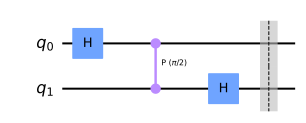

In [9]:
pi = np.pi

def QFT(n,swap = True, draw = False):
    """ A function to generate the QFT circuit"""

    qc = QuantumCircuit(n)

    # First qubit
    for i in range(n):
        # print(i)
        qc.h(i)
        l = 2
        for j in range(n-1,i,-1):
            
            theta = 2*pi/(2**(l))
            qc.cp(theta,j,i)
            l += 1

    qc.barrier()

    if swap: # Order of qubits needs to be reversed 
        for k in range(int((n- n%2)/2)): 
            qc.swap(k,int(n-1 - k))
    if draw:
        return  qc.draw()

    return qc

QFT(n= 2,swap = False, draw= True)

In [6]:
%qiskit_version_table